In [1]:
import numpy as np
import matplotlib.pyplot as plt

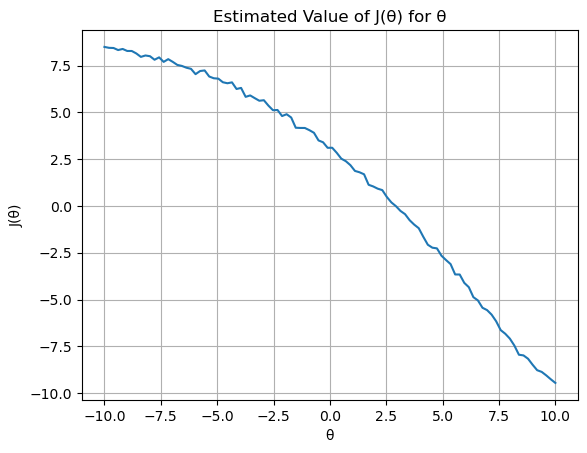

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = 10       
beta = 1 
num_rollouts = 10000  
num_steps = 2 * L + 3  

# Reward structure
rNT = -1    
rL = 0       
rR = 20      

# sigmoid policy
def policy(theta, s, beta=0.5):
    """Probability of going right (action R) in state s, given theta"""
    return 1 / (1 + np.exp(-beta * (s - theta)))

def simulate_episode(theta):
    """Simulate an episode for a given theta"""
    s = np.random.randint(-L, L+1)  
    total_reward = 0
    while s != L + 1 and s != -(L + 1):  
        action_prob = policy(theta, s)
        action = 1 if np.random.rand() < action_prob else -1  
        if action == 1:
            s += 1  # move right
            total_reward += rNT  
        else:
            s -= 1  # move left
            total_reward += rNT  

    # reward when reaching terminal state
    if s == L + 1:
        total_reward += rR  
    else:
        total_reward += rL  
    
    return total_reward

def estimate_J(theta):
    """Estimate J(theta) by averaging rewards over many rollouts"""
    rewards = [simulate_episode(theta) for _ in range(num_rollouts)]
    return np.mean(rewards)

# compute J(theta) 
theta_values = np.linspace(-L, L, 100)  # Range of theta values
J_values = [estimate_J(theta) for theta in theta_values]


plt.plot(theta_values, J_values, label='J(θ)')
plt.xlabel('θ')
plt.ylabel('J(θ)')
plt.title('Estimated Value of J(θ) for θ')
plt.grid(True)
plt.show()


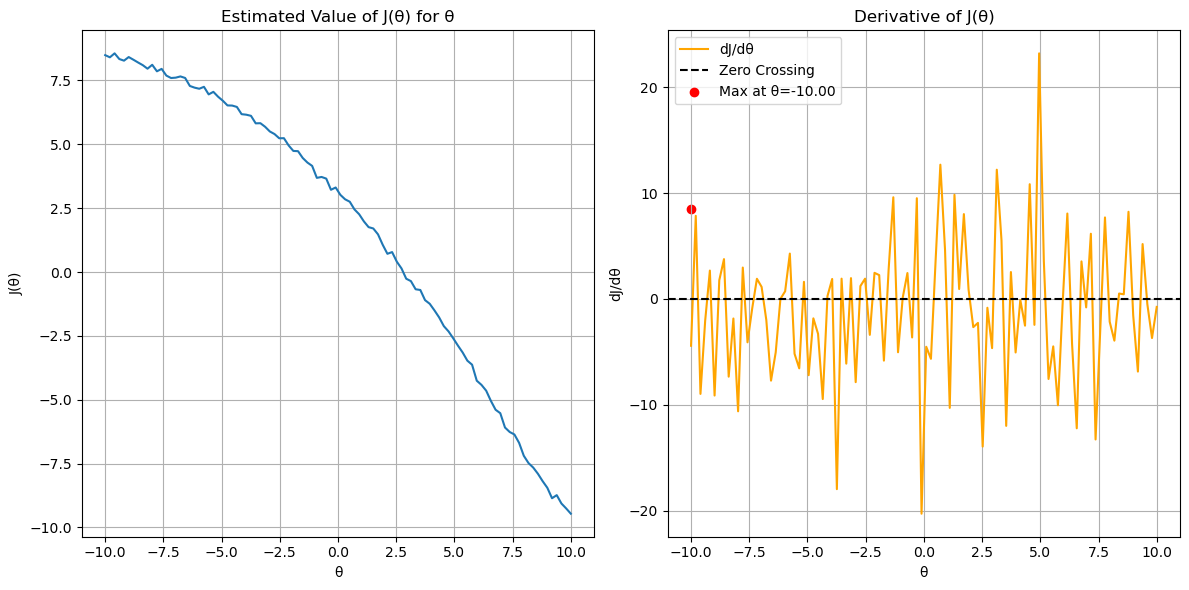

The approximate value of θ that maximizes J(θ) is: -10.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


L = 10       
beta = 1  
num_rollouts = 10000  
num_steps = 2 * L + 3  
h = 0.01        

# compute J(theta) 
theta_values = np.linspace(-L, L, 100)  
J_values = [estimate_J(theta) for theta in theta_values]

# derivative 
def derivative(theta, h):
    """Estimate the derivative of J(theta) using finite difference"""
    J_plus_h = estimate_J(theta + h)
    J_minus_h = estimate_J(theta - h)
    return (J_plus_h - J_minus_h) / (2 * h)

derivatives = [derivative(theta, h) for theta in theta_values]

# find the zero-crossing of the derivative
zero_crossing_idx = np.where(np.diff(np.sign(derivatives)))[0][0]  
theta_max = theta_values[zero_crossing_idx]

plt.figure(figsize=(12, 6))

# J(theta)
plt.subplot(1, 2, 1)
plt.plot(theta_values, J_values, label='J(θ)')
plt.xlabel('θ')
plt.ylabel('J(θ)')
plt.title('Estimated Value of J(θ) for θ')
plt.grid(True)

# derivative of J(theta)
plt.subplot(1, 2, 2)
plt.plot(theta_values, derivatives, label="dJ/dθ", color='orange')
plt.axhline(0, color='black', linestyle='--', label='Zero Crossing')
plt.xlabel('θ')
plt.ylabel('dJ/dθ')
plt.title('Derivative of J(θ)')
plt.grid(True)

# maximum point
plt.scatter(theta_max, estimate_J(theta_max), color='red', label=f'Max at θ={theta_max:.2f}')
plt.legend()

plt.tight_layout()
plt.show()


print(f"The approximate value of θ that maximizes J(θ) is: {theta_max:.2f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 10       
beta = 0.5   
num_rollouts = 10000 
num_steps = 2 * L + 3  

def log_policy_gradient(theta, s, a, beta=0.5):
    """Compute the gradient of the log of the policy"""
    p_R = policy(theta, s, beta)
    if a == 1:  # Action R
        return (1 - p_R) * beta * (s - theta)
    else:  # Action L
        return -p_R * beta * (s - theta)

def simulate_episode(theta):
    """Simulate an episode for a given theta and return the states, actions, and rewards"""
    states = []
    actions = []
    rewards = []
    s = np.random.randint(-L, L+1) 
    total_reward = 0
    while s != L + 1 and s != -(L + 1):  # until reaching a terminal state
        action_prob = policy(theta, s)
        action = 1 if np.random.rand() < action_prob else -1  #(1 = R, -1 = L)
        
        states.append(s)
        actions.append(action)
        
        if action == 1:
            s += 1  
            rewards.append(rNT)  
        else:
            s -= 1  
            rewards.append(rNT) 
        
    # reward when reaching terminal state
    if s == L + 1:
        rewards.append(rR)  
    else:
        rewards.append(rL) 
    
    return states, actions, rewards

def compute_policy_gradient(theta):
    """Compute the policy gradient ∇J(θ) using Monte Carlo rollouts"""
    gradient = 0
    for _ in range(num_rollouts):
        states, actions, rewards = simulate_episode(theta)
        cumulative_reward = np.zeros(len(rewards))
        cumulative_reward[-1] = rewards[-1]
        for t in range(len(rewards) - 2, -1, -1):
            cumulative_reward[t] = rewards[t] + cumulative_reward[t + 1] 

        # compute gradient 
        for t in range(len(states)):
            gradient += cumulative_reward[t] * log_policy_gradient(theta, states[t], actions[t])
    
    # average over the number of rollouts
    return gradient / num_rollouts



print(compute_policy_gradient(0.0))


# theta_values = np.linspace(-L, L, 100)  # Range of theta values
# gradients = [compute_policy_gradient(theta) for theta in theta_values]


2.4925789850370443


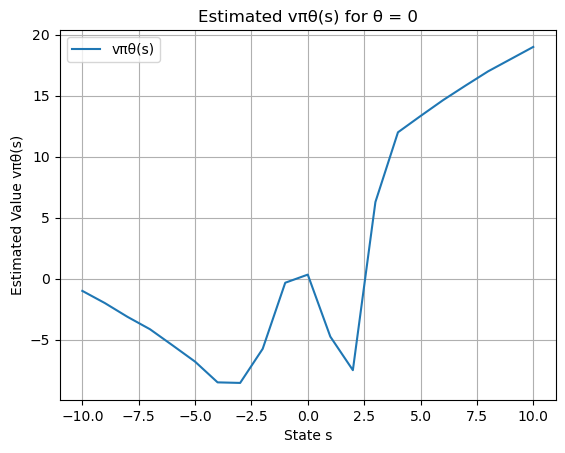

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10         # Length of the state space (example: L=10)
beta = 0.5     # Parameter for the sigmoid function
gamma = 1      # No discounting (γ = 1)
num_rollouts = 30  # Number of Monte Carlo rollouts
num_steps = 2 * L + 3  # Max number of steps (from -L-1 to L+1)
theta_0 = 0    # Initial policy parameter (θ0 = 0)
   

def estimate_value_function(theta, num_rollouts=100):
    """Estimate vπθ(s) for all states using Monte Carlo rollouts"""
    v_estimates = {s: 0 for s in range(-L, L+1)}  
    state_counts = {s: 0 for s in range(-L, L+1)}  

    for _ in range(num_rollouts):
        states, actions, rewards = simulate_episode(theta)
        cumulative_reward = np.zeros(len(rewards))
        cumulative_reward[-1] = rewards[-1]
        
        # backward propagation of rewards
        for t in range(len(rewards) - 2, -1, -1):
            cumulative_reward[t] = rewards[t] + gamma * cumulative_reward[t + 1]

        # update v(s) for each state 
        for t in range(len(states)):
            s = states[t]
            v_estimates[s] += cumulative_reward[t]
            state_counts[s] += 1
    
    # normalize v(s) estimates
    for s in v_estimates:
        if state_counts[s] > 0:
            v_estimates[s] /= state_counts[s]
    
    return v_estimates

v_estimates = estimate_value_function(theta_0, num_rollouts)


states = np.arange(-L, L+1)
values = [v_estimates[s] for s in states]
plt.plot(states, values, label='vπθ(s)')
plt.xlabel('State s')
plt.ylabel('Estimated Value vπθ(s)')
plt.title('Estimated vπθ(s) for θ = {}'.format(theta_0))
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


L = 10         
beta = 0.5     
gamma = 1      
num_rollouts = 100 
num_steps = 2 * L + 3 
theta_0 = 0  

def compute_policy_gradient(theta, v_estimates, num_rollouts=100):
    """Compute the policy gradient using the advantage method"""
    policy_gradients = np.zeros_like(theta, dtype=float)
    
    for _ in range(num_rollouts):
        states, actions, rewards = simulate_episode(theta)
        cumulative_reward = np.zeros(len(rewards))
        cumulative_reward[-1] = rewards[-1]
        
        # backward propagation to calculate cumulative rewards
        for t in range(len(rewards) - 2, -1, -1):
            cumulative_reward[t] = rewards[t] + gamma * cumulative_reward[t + 1]

        # compute the advantage and the policy gradient
        for t in range(len(states)):
            s = states[t]
            a = actions[t]
            q_hat = cumulative_reward[t]
            v_s = v_estimates[s]
            advantage = q_hat - v_s
            
            # gradient of the log-probability of the action taken
            if a == 1:  # action R
                grad_log_pi = beta * (states[t] - theta) * policy(theta, s) * (1 - policy(theta, s))
            else:  # action L
                grad_log_pi = -beta * (states[t] - theta) * policy(theta, s) * (1 - policy(theta, s))
            
            # update the policy gradient 
            policy_gradients += advantage * grad_log_pi
    
    # normalize the gradient
    policy_gradients /= num_rollouts
    return policy_gradients

v_estimates = estimate_value_function(theta_0, num_rollouts)

gradients = compute_policy_gradient(theta_0, v_estimates, num_rollouts)

print("Computed policy gradient:", gradients)



Computed policy gradient: 0.6775992055518375


Iteration 0:
  θ = 0.6735767003455235
  Gradient = 0.478707992113634
  Value estimates = {-10: -1.0059288537549407, -9: -2.015317286652079, -8: -3.0482509047044632, -7: -4.0932642487046635, -6: -5.201503759398496, -5: -6.354561101549053, -4: -7.551330798479087, -3: -8.869918699186991, -2: -10.093439363817097, -1: -9.112033195020746, 0: -5.389721627408994, 1: 0.09503239740820735, 2: 5.759219088937093, 3: 9.603305785123966, 4: 12.015037593984962, 5: 13.536379018612521, 6: 14.754857997010463, 7: 15.869262865090404, 8: 16.92233009708738, 9: 17.956284153005466, 10: 18.982}
Iteration 1:
  θ = 1.105202275038971
  Gradient = 0.43162557469344753
  Value estimates = {-10: -1.0173410404624277, -9: -2.027339642481598, -8: -3.051103368176539, -7: -4.087855297157622, -6: -5.157205240174672, -5: -6.2634920634920634, -4: -7.405063291139241, -3: -8.855949895615867, -2: -10.245283018867925, -1: -10.430379746835444, 0: -7.81151832460733, 1: -1.9853300733496333, 2: 4.354368932038835, 3: 8.89532293986637, 

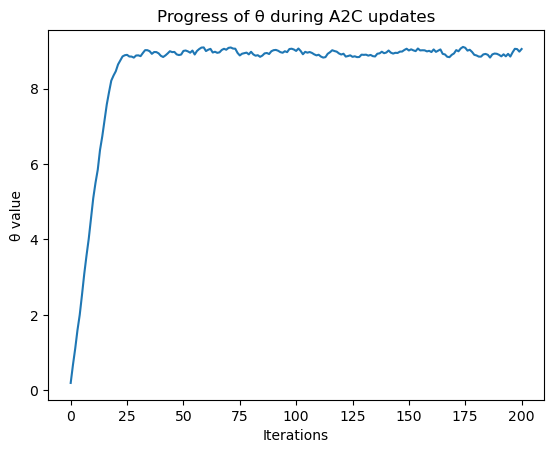

Final value of θ: 9.048547577746865


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 10        
beta = 0.5     
gamma = 1     
num_rollouts = 2000 
num_steps = 2 * L + 3  
theta_0 = 0.19486870823188945    
alpha = 1   
max_iterations = 200  

theta = float(theta_0)
theta_values = [theta]

for iteration in range(max_iterations):
    # estimate the value function
    v_estimates = estimate_value_function(theta, num_rollouts)
    
    # policy gradient
    grad = compute_policy_gradient(theta, v_estimates, num_rollouts)
    grad = np.clip(grad, -1, 1)  # Add this line
    theta += alpha * grad
    theta_values.append(theta)

    # debug
    print(f"Iteration {iteration}:")
    print(f"  θ = {theta}")
    print(f"  Gradient = {grad}")
    print(f"  Value estimates = {v_estimates}")



plt.plot(theta_values)
plt.title('Progress of θ during A2C updates')
plt.xlabel('Iterations')
plt.ylabel('θ value')
plt.show()

print("Final value of θ:", theta)
